# 🧠 Mental Health Discourse on Reddit/X

##Install and Import Libraries

In [1]:
!pip install -q kaggle opendatasets pandas numpy scikit-learn matplotlib seaborn plotly pyarrow fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
!pip install vaderSentiment
!pip install gensim
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from gensim import corpora, models
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 72.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

##Load Dataset

In [3]:
import os
import opendatasets as od

DATA_URL = "https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch?resource=download"
data_dir = None

try:
    od.download(DATA_URL)
except Exception:
    pass

# Find folder containing "Suicide and Depression Detection"
for root, dirs, files in os.walk("."):
    if "Suicide and Depression Detection" in root.lower():
        data_dir = root
        break

print("Data directory:", data_dir if data_dir else "not found (will use sample)")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gokulgorthisunny
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch


100%|██████████| 60.6M/60.6M [00:00<00:00, 730MB/s]

Data directory: not found (will use sample)


In [5]:
df = pd.read_csv("./suicide-watch/Suicide_Detection.csv")  # Corrected path
print("Rows:", len(df))
df.head()

Rows: 232074


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


##Text Cleaning Function

##Sentiment Analysis (VADER)

In [7]:
import sys
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
!pip install vaderSentiment

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_score(text):
    return analyzer.polarity_scores(text)['compound']

df['vader_score'] = df['clean_text'].apply(get_vader_score)

def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['vader_score'].apply(categorize_sentiment)
print("VADER sentiment analysis complete. New columns 'vader_score' and 'sentiment' added.")

VADER sentiment analysis complete. New columns 'vader_score' and 'sentiment' added.


##Display Sample Sentiment Data

In [9]:
print("Displaying the first 5 rows of the DataFrame with sentiment analysis results:")
df.head()

Displaying the first 5 rows of the DataFrame with sentiment analysis results:


,Unnamed: 0,text,class,clean_text,vader_score,sentiment
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently left wife ...,-0.9760,negative
1,3,Am I weird I don't get affected by compliments...,non-suicide,weird get affected compliments coming someone ...,0.5563,positive
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally almost never hear bad year ever swear ...,0.2025,positive
3,8,i need helpjust help me im crying so hard,suicide,need helpjust help im crying hard,-0.2023,negative
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,losthello name adam struggling years afraid pa...,-0.9955,negative


##LDA Topics Extraction for Negative Posts

In [15]:
import pandas as pd

topic_data = []
for i, topic_str in lda_model_negative.print_topics(num_words=8):
    keywords_with_weights = topic_str.split(' + ')
    keywords = [kw.split('*')[1].strip('"') for kw in keywords_with_weights]
    topic_data.append({'Topic': f"Topic {i+1}", 'Keywords': ', '.join(keywords)})

topic_df = pd.DataFrame(topic_data)

print("LDA Topics for Negative Posts:")
display(topic_df)

LDA Topics for Negative Posts:


,Topic,Keywords
0,Topic 1,"fuck, cecil, day, penis, ㅤ, shit, fucking, ass"
1,Topic 2,"want, im, fucking, na, like, dont, know, die"
2,Topic 3,"life, feel, like, want, know, people, would, even"
3,Topic 4,"like, people, school, amp, get, say, shit, one"
4,Topic 5,"filler, got, time, get, school, back, told, go"


##Sentiment Distribution Visualization

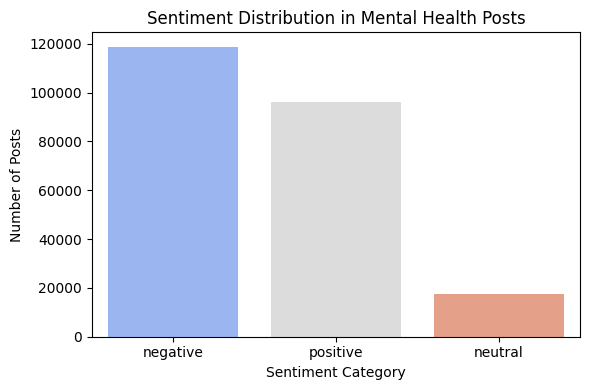

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='coolwarm', legend=False)
plt.title("Sentiment Distribution in Mental Health Posts")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()

##Word Cloud Visualization of Emotional and Self-Disclosure Terms


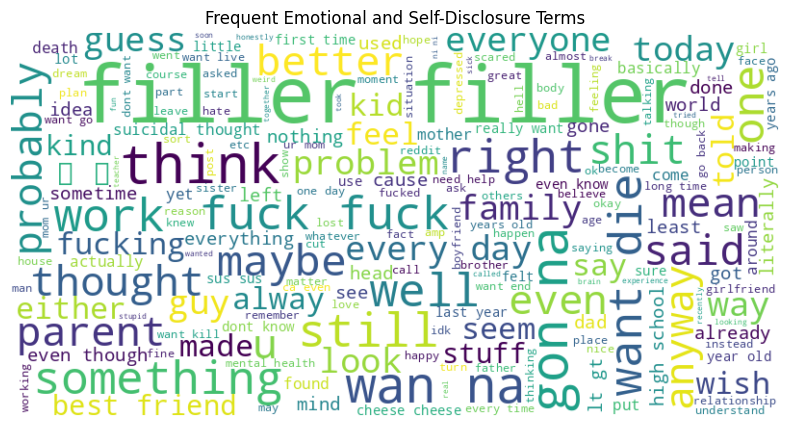

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent Emotional and Self-Disclosure Terms')
plt.show()

##Split into Positive/Negative Post DataFrames

In [18]:
negative_posts_df = df[df['sentiment'] == 'negative']
print(f"Number of negative posts: {len(negative_posts_df)}")
negative_posts_df.head()

Number of negative posts: 118766


,Unnamed: 0,text,class,clean_text,vader_score,sentiment
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently left wife ...,-0.9760,negative
3,8,i need helpjust help me im crying so hard,suicide,need helpjust help im crying hard,-0.2023,negative
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,losthello name adam struggling years afraid pa...,-0.9955,negative
5,11,Honetly idkI dont know what im even doing here...,suicide,honetly idki dont know im even feel like nothi...,-0.9488,negative
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide,trigger warning excuse self inflicted burns kn...,-0.9305,negative


In [19]:
positive_posts_df = df[df['sentiment'] == 'positive']
print(f"Number of positive posts: {len(positive_posts_df)}")
positive_posts_df.head()

Number of positive posts: 95986


,Unnamed: 0,text,class,clean_text,vader_score,sentiment
1,3,Am I weird I don't get affected by compliments...,non-suicide,weird get affected compliments coming someone ...,0.5563,positive
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally almost never hear bad year ever swear ...,0.2025,positive
8,16,"Everyone wants to be ""edgy"" and it's making me...",non-suicide,everyone wants edgy making self conscious feel...,0.9654,positive
13,22,"death, continuedI posted here before and saw s...",suicide,death continuedi posted saw something interest...,0.8428,positive
21,31,Me: I know I have a really toxic house and I d...,non-suicide,know really toxic house best cope going school...,0.6666,positive


##Keyword Frequency Count for Emotions

In [20]:
emotion_words = ['anxiety', 'depression', 'help', 'hope', 'fear', 'stress', 'therapy']
for word in emotion_words:
    count = df['clean_text'].str.contains(word).sum()
    print(f"{word.capitalize()}: {count}")

Anxiety: 10186
Depression: 17084
Help: 42531
Hope: 20912
Fear: 5588
Stress: 6978
Therapy: 6551


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
import numpy as np

/tmp/ipython-input-2441412297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emotion_df, x='Emotion/Keyword', y='Count', palette='mako')


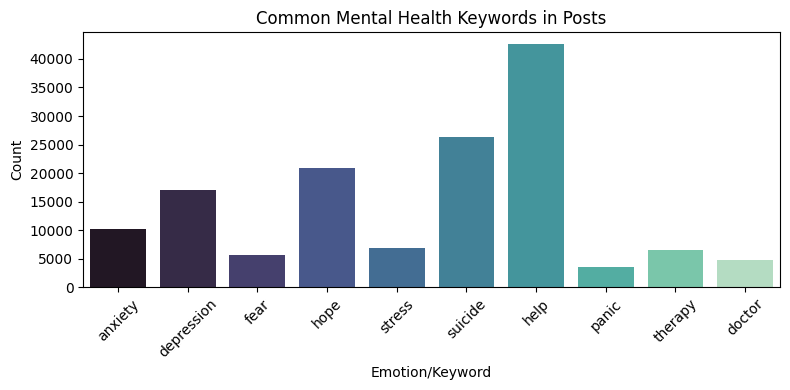

In [22]:
emotion_words = ['anxiety', 'depression', 'fear', 'hope', 'stress', 'suicide', 'help', 'panic', 'therapy', 'doctor']
freq = {word: df['clean_text'].str.contains(word).sum() for word in emotion_words}
emotion_df = pd.DataFrame(list(freq.items()), columns=['Emotion/Keyword', 'Count'])

plt.figure(figsize=(8,4))
sns.barplot(data=emotion_df, x='Emotion/Keyword', y='Count', palette='mako')
plt.title("Common Mental Health Keywords in Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Assign Dominant LDA Topics to Negative Posts

In [27]:
import pandas as pd
from gensim import corpora, models

negative_posts_df = df[df['sentiment'] == 'negative'].copy()

negative_texts = negative_posts_df['clean_text']
tokens_negative = [str(t).split() for t in negative_texts]
dictionary_negative = corpora.Dictionary(tokens_negative)
corpus_negative = [dictionary_negative.doc2bow(text) for text in tokens_negative]

lda_model_negative = models.LdaModel(corpus_negative, num_topics=5, id2word=dictionary_negative, passes=10, random_state=42)

def get_dominant_topic(lda_model, corpus_item):
    topics = lda_model.get_document_topics(corpus_item, minimum_probability=0.0)
    dominant_topic = sorted(topics, key=lambda x: x[1], reverse=True)[0][0]
    return dominant_topic + 1
negative_posts_df['dominant_topic'] = [get_dominant_topic(lda_model_negative, ci) for ci in corpus_negative]

print("Dominant topics assigned to negative posts. Displaying the first 5 rows with the new 'dominant_topic' column:")
negative_posts_df.head()

Dominant topics assigned to negative posts. Displaying the first 5 rows with the new 'dominant_topic' column:


,Unnamed: 0,text,class,clean_text,vader_score,sentiment,word_count,dominant_topic
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently left wife ...,-0.9760,negative,60,5
3,8,i need helpjust help me im crying so hard,suicide,need helpjust help im crying hard,-0.2023,negative,6,2
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,losthello name adam struggling years afraid pa...,-0.9955,negative,199,3
5,11,Honetly idkI dont know what im even doing here...,suicide,honetly idki dont know im even feel like nothi...,-0.9488,negative,139,3
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide,trigger warning excuse self inflicted burns kn...,-0.9305,negative,103,3


##VADER Score Distribution by Dominant Topic in Negative Posts

/tmp/ipython-input-277459196.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=negative_posts_df, x='dominant_topic', y='vader_score', palette='viridis')


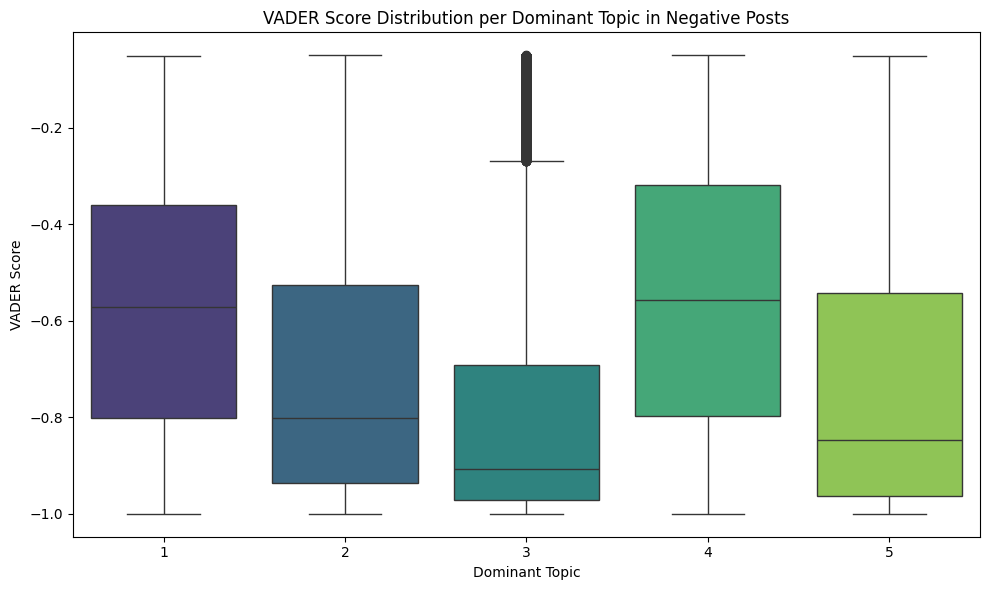

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=negative_posts_df, x='dominant_topic', y='vader_score', palette='viridis')
plt.title('VADER Score Distribution per Dominant Topic in Negative Posts')
plt.xlabel('Dominant Topic')
plt.ylabel('VADER Score')
plt.tight_layout()
plt.show()

##Save Results

In [30]:
df.to_csv("Mental_Health_Analysis_Results.csv", index=False)
print("\n✅ Analysis complete. Results saved.")


✅ Analysis complete. Results saved.
